In [7]:
import requests
import numpy as np
image_data = np.zeros((3, 3))
mask_data = np.zeros((3, 3))
annot_data = ([{'type': 'polyline', 'points': [[1295.0, 1463.0, 0.0]]},
              {'type': 'polyline', 'points': [[1295.0, 1463.0, 0.0]]}])

In [8]:
try:
    payload = {"image": image_data.tolist(), "mask": mask_data.tolist(), "nuclei": annot_data}
    response = requests.post("http://172.19.0.1:8000/process_img_msk_anot/", json=payload)
    if response.status_code == 200:
        print("Request was successful:")
        print(response.json())
    else:
        print(f"Request failed with status code: {response.status_code}")
        print(response.text)
except requests.exceptions.RequestException as e:
    # Handle any exceptions related to the request
    print(f"Request error: {e}")
except Exception as e:
    # Handle any other unexpected exceptions
    print(f"Error: {e}")

Request was successful:
{'nuclei': 'received all data'}


In [25]:
image_data.shape

(100, 100)

In [16]:
type(annot_data)

list

In [17]:
annot_data

[{'data': [0, 0, 0]}]

In [3]:
from numpy import load
import numpy as np
import cv2
import matplotlib.pyplot as plt
# load array
img = load('./aiInferenceModel/image.npy')
msk = load('./aiInferenceModel/mask.npy')
glb = load('./aiInferenceModel/global.npy')
props = load('./aiInferenceModel/props.npy', allow_pickle=True)

FileNotFoundError: [Errno 2] No such file or directory: './aiInferenceModel/props.npy'

In [176]:
msk.shape

(1024, 1024)

In [21]:
cv2.imwrite('image.png', img)
plt.imsave('mask.png', msk)

In [31]:
from monai.transforms import LoadImaged, EnsureChannelFirstd, Compose, ScaleIntensityRangeD
from monai.data import PILReader
from monai.apps.nuclick.transforms import AddLabelAsGuidanced

transforms = Compose([
    LoadImaged(keys="image", dtype=np.uint8, reader=PILReader(converter=lambda im: im.convert("RGB"))),
    LoadImaged(keys="label", dtype=np.uint8, reader=PILReader(converter=lambda im: im.convert("L"))),
    EnsureChannelFirstd(keys=("image", "label")),
    ScaleIntensityRangeD(keys="image", a_min=0.0, a_max=255.0, b_min=-1.0, b_max=1.0),
    AddLabelAsGuidanced(keys="image", source="label"),
])

# Create a dictionary with the input data (assuming 'sample_array' contains 'image')
input_data = {"image": 'image.png', "label":'mask.png'}

# Apply the transformations
output_data = transforms(input_data)

In [34]:
output_data['label'].shape

torch.Size([1, 1024, 1024])

In [7]:
sample_array = np.random.rand(3, 128, 128)
loader = LoadNiftid(keys=["image", "label"])
input_data = {"image": sample_array, "label": sample_array}
output_data = loader(input_data)

NameError: name 'LoadNiftid' is not defined

### Read image and labels and correct the center

In [20]:
from PIL import Image
import numpy as np
im = np.asarray(Image.open('./aiInferenceModel/image.png')) 
msk = cv2.imread('./aiInferenceModel/mask.png')
# msk = (msk > 250).astype(np.uint8)
np.min(msk)

1

In [21]:
#calculate center of a nuclei
cx = 1311-1240
cy = 1227-1169
cx, cy

(71, 58)

In [22]:
imc = im[cx-30:cx+30, cy-30:cy+30]

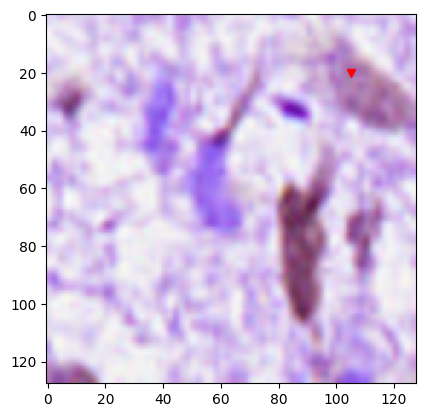

In [28]:
plt.plot(105, 20, marker='v', color="red")
plt.imshow(im)

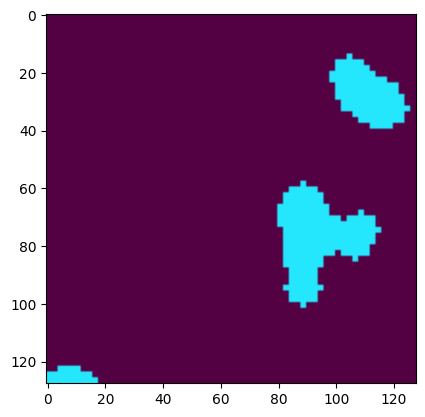

In [29]:
plt.imshow(msk)

In [56]:
_, binary_mask = cv2.threshold(msk, 100, 255, cv2.THRESH_BINARY)

In [59]:
zero_label = np.zeros(msk.shape)
zero_label[0:40,90:125] = 1
instances = binary_mask* zero_label

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


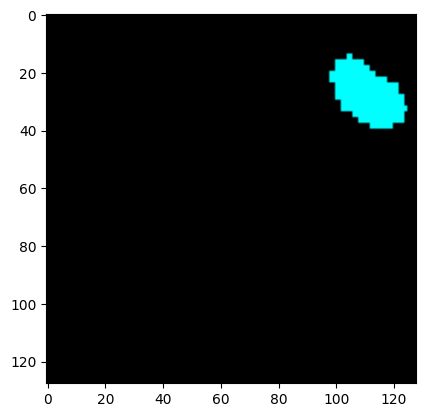

In [60]:
plt.imshow(instances)

In [62]:
np.unique(instances)

array([  0., 255.])